In [284]:
#### final dataset
import pandas as pd

# File paths
train_file = './data/train_all_data_04feb.csv'
test_file = './data/test_all_data_04feb.csv'
combined_file = './data/all_data_04feb.csv'

# Read train and test CSV files
train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)

# Combine train and test data
data = pd.concat([train_data, test_data], ignore_index=True)

# Write the combined data to a new CSV file
data.to_csv(combined_file, index=False)

# Print the column names
data.columns

/var/folders/_c/sdnjbh3j2k32jff8ry29g28w0000gn/T/ipykernel_2768/168568871.py:10: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv(train_file)
/var/folders/_c/sdnjbh3j2k32jff8ry29g28w0000gn/T/ipykernel_2768/168568871.py:11: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  test_data = pd.read_csv(test_file)


Index(['Unnamed: 0.1', 'Unnamed: 0', 'subject_id', 'hadm_id', 'event', 'time',
       'event_type', 'last_dose_time', 'time_since_last_dosage',
       'prev_dose_amount', 'next_vanco_time', 'next_vanco_level',
       'time_to_next_vanco', 'prev_vanco_time', 'time_since_last_vanco',
       'prev_vanco_level', 'second_last_vanco_time',
       'second_last_vanco_amount', 'time_since_second_last_vanco',
       'third_last_vanco_time', 'third_last_vanco_amount',
       'time_since_third_last_vanco', 'second_last_dose_time',
       'second_last_dose_amount', 'time_since_second_last_dose',
       'next_event_type', 'current_vanco_level',
       'dosage_btw_current_and_last_vanco_level',
       'dosage_btw_current_and_second_last_vanco_level',
       'dosage_btw_current_and_third_last_vanco_level', 'time_str',
       'prev_bun_amount', 'prev_creatinine_amount', 'prev_bun_creatinine_time',
       'time_since_prev_bun_creatinine', 'gender', 'admittime', 'age',
       'insurance', 'language', 'ma

In [285]:
data_unique = data.drop_duplicates(subset='subject_id', keep = 'first')
data_unique.shape[0], data.shape[0]

(5237, 98222)

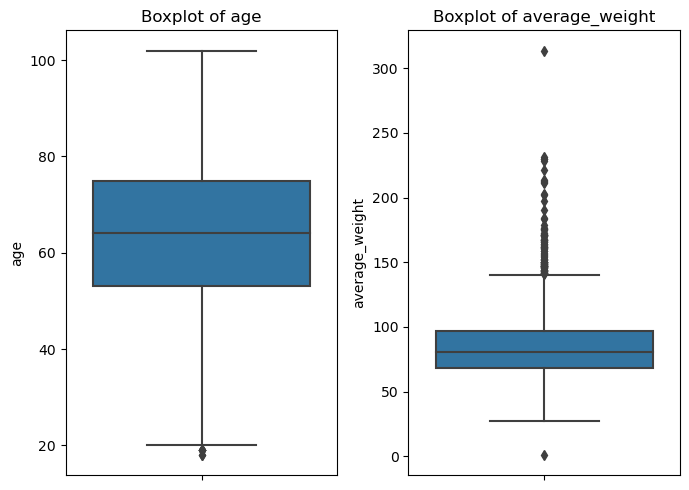

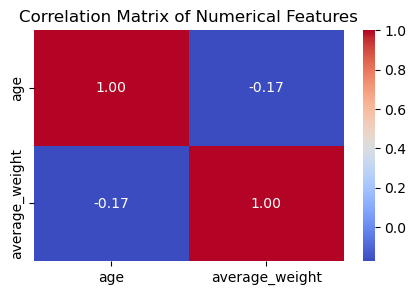

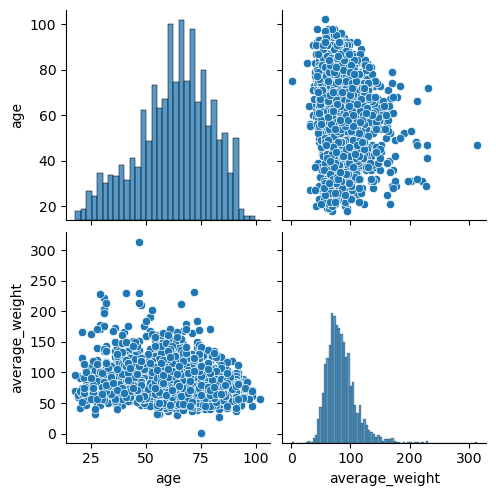

In [286]:
data_features_numerical = ['age', 'average_weight']
df_numerical = data_unique[data_features_numerical]
df_numerical.describe()

# Box plots for numerical features
fig, axes = plt.subplots(1, 2, figsize=(7, 5))
axes = axes.flatten()

for i, feature in enumerate(data_features_numerical):
    sns.boxplot(y=df_numerical[feature], ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

# Correlation matrix
correlation_matrix = df_numerical.corr()
plt.figure(figsize=(5, 3))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

# Pairplot
sns.pairplot(df_numerical)
plt.show()


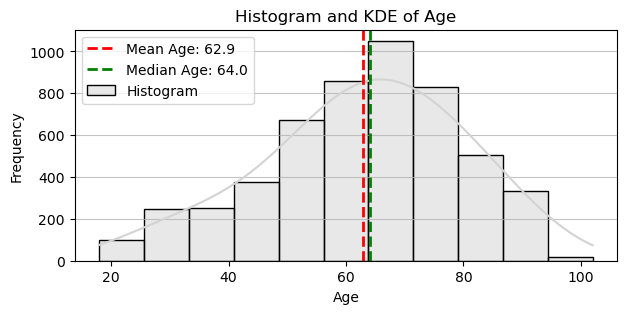

In [296]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_numerical is already defined with a column 'age'

# Extract 'age' column
age_data = df_numerical['age']

# Descriptive statistics
mean_age = age_data.mean()
median_age = age_data.median()
std_dev_age = age_data.std()

# Plot histogram and KDE of 'age' with adjusted bandwidth
plt.figure(figsize=(7, 3))

sns.histplot(age_data, bins=11, kde=True, kde_kws={'bw_adjust': 3}, color='lightgrey', edgecolor='black', label='Histogram')
plt.title('Histogram and KDE of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=2, label=f'Mean Age: {mean_age:.1f}')
plt.axvline(median_age, color='green', linestyle='dashed', linewidth=2, label=f'Median Age: {median_age}')

plt.legend()
plt.show()


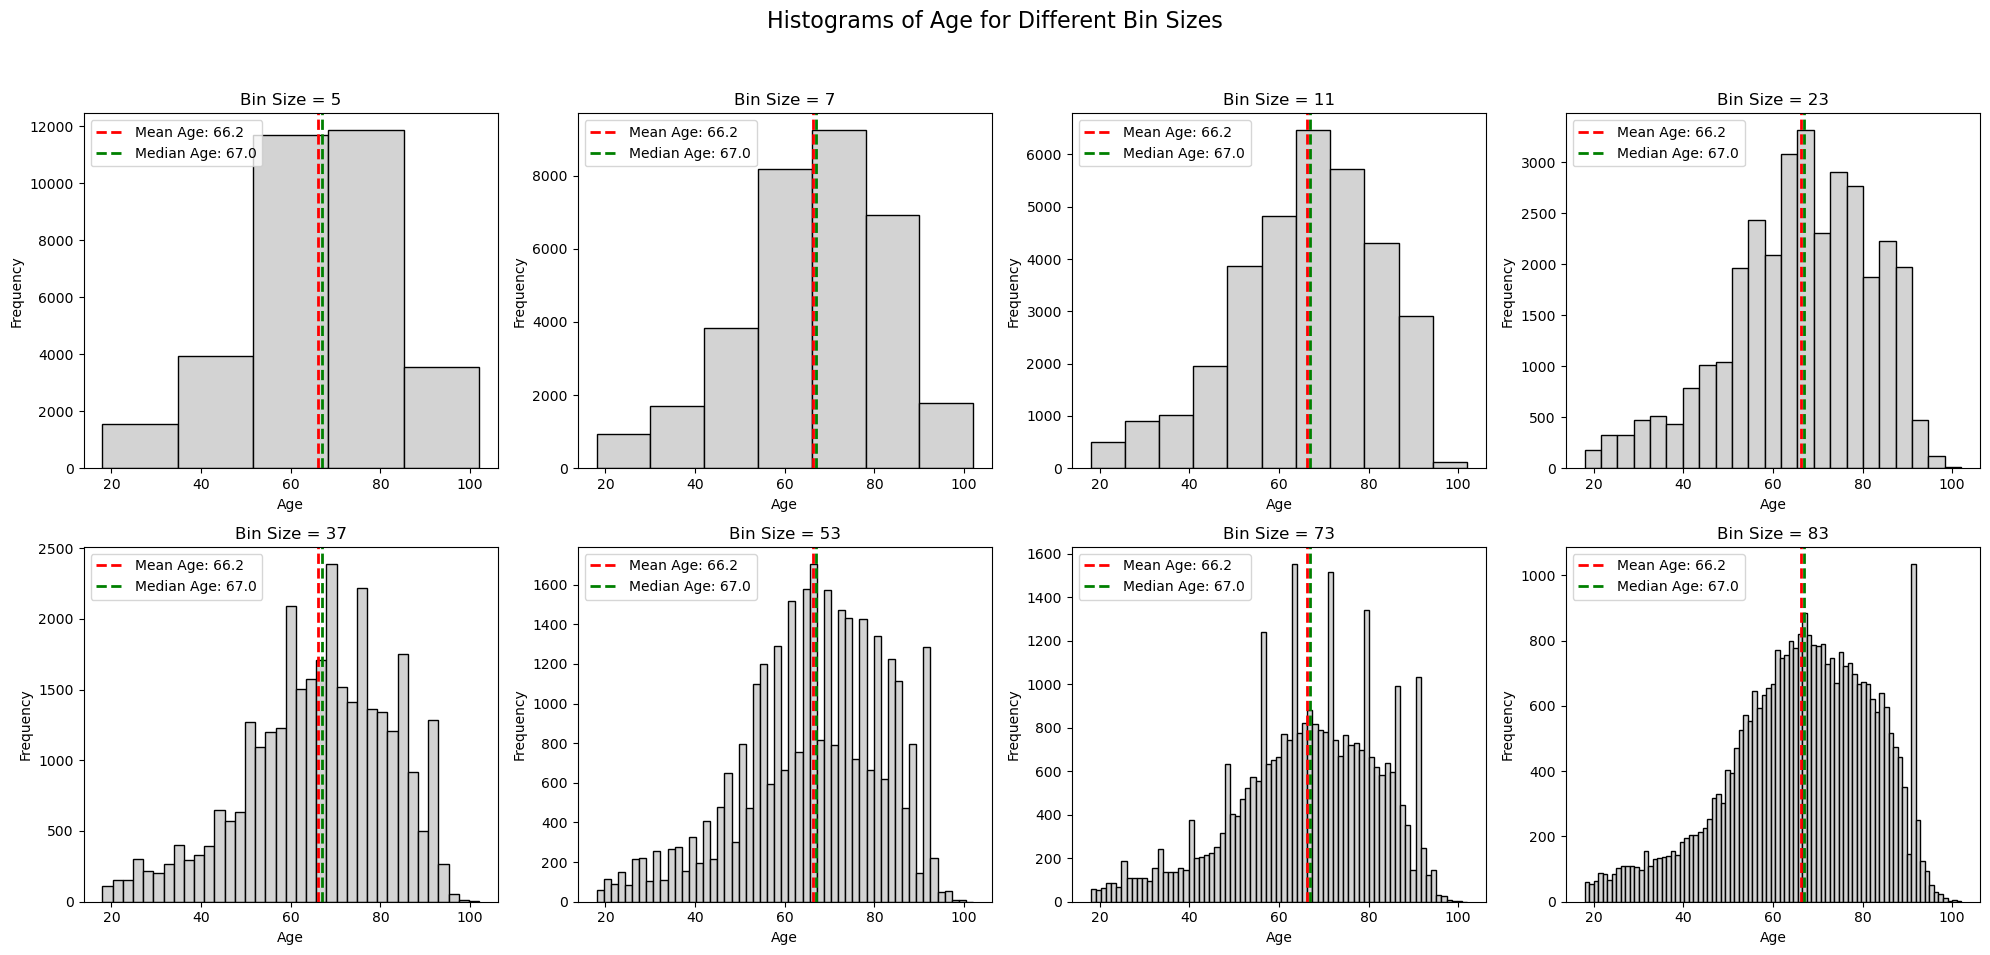

In [281]:
import matplotlib.pyplot as plt

# Assuming df_numerical is already defined with a column 'age'

# Different bin sizes to compare
bin_sizes = [5, 7, 11, 23, 37, 53, 73, 83]

# Descriptive statistics
mean_age = df_numerical['age'].mean()
median_age = df_numerical['age'].median()
std_dev_age = df_numerical['age'].std()

# Create subplots for each bin size
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
fig.suptitle('Histograms of Age for Different Bin Sizes', fontsize=16)

for i, bin_size in enumerate(bin_sizes):
    row = i // 4
    col = i % 4
    
    # Plot histogram with the specified bin size
    axes[row, col].hist(df_numerical['age'], bins=bin_size, color='lightgrey', edgecolor='black')
    axes[row, col].set_title(f'Bin Size = {bin_size}')
    axes[row, col].set_xlabel('Age')
    axes[row, col].set_ylabel('Frequency')
    
    # Add descriptive lines for mean and median
    axes[row, col].axvline(mean_age, color='red', linestyle='dashed', linewidth=2, label=f'Mean Age: {mean_age:.1f}')
    axes[row, col].axvline(median_age, color='green', linestyle='dashed', linewidth=2, label=f'Median Age: {median_age}')
    axes[row, col].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


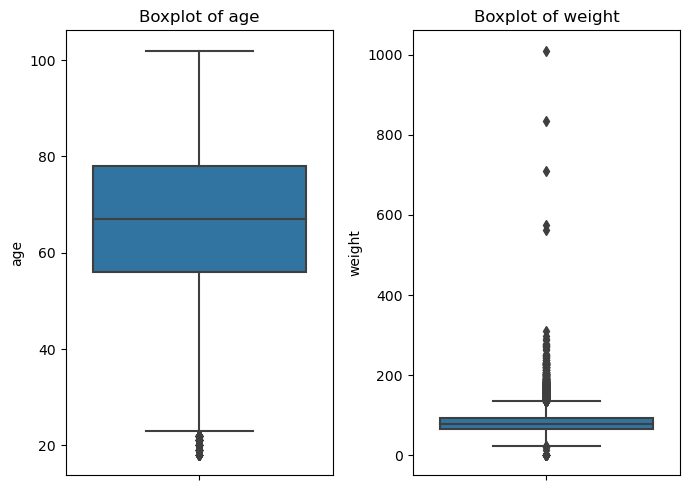

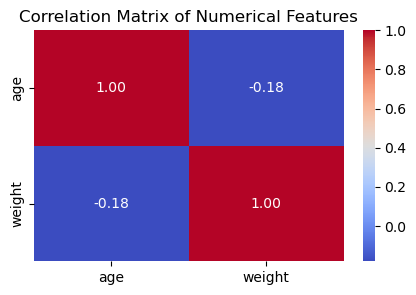

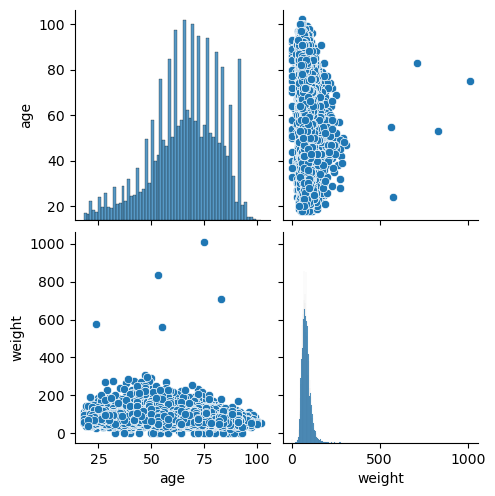

In [179]:
df_features_numerical = ['age', 'weight']
df_numerical = patients_dropped[df_features_numerical]
df_numerical.describe()

# Box plots for numerical features
fig, axes = plt.subplots(1, 2, figsize=(7, 5))
axes = axes.flatten()

for i, feature in enumerate(df_features_numerical):
    sns.boxplot(y=df_numerical[feature], ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

# Correlation matrix
correlation_matrix = df_numerical.corr()
plt.figure(figsize=(5, 3))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

# Pairplot
sns.pairplot(df_numerical)
plt.show()


/var/folders/_c/sdnjbh3j2k32jff8ry29g28w0000gn/T/ipykernel_2768/4085636534.py:21: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/test_all_data_04feb.csv')
/var/folders/_c/sdnjbh3j2k32jff8ry29g28w0000gn/T/ipykernel_2768/4085636534.py:75: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/test_all_data_04feb.csv')


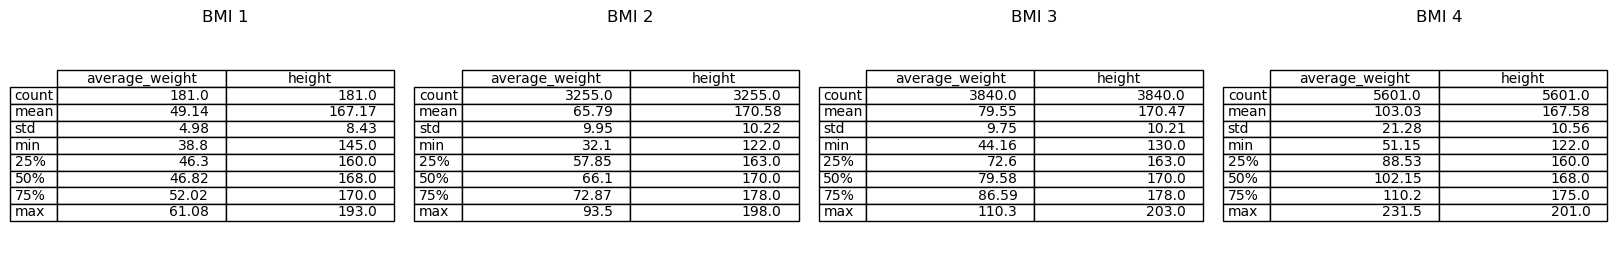

All dataframes have the same columns.


/var/folders/_c/sdnjbh3j2k32jff8ry29g28w0000gn/T/ipykernel_2768/4085636534.py:120: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/test_all_data_04feb.csv')
/var/folders/_c/sdnjbh3j2k32jff8ry29g28w0000gn/T/ipykernel_2768/4085636534.py:145: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/test_all_data_04feb.csv')


True

In [139]:
#!/usr/bin/env python
# coding: utf-8

# #### overall goal
# Iteration 01: Evaluate the *test* results for following subgroups:
# * age $\leq$ 65, >65; <br>
# * BMI $\leq$ 18.5, > 18.5 and  $\leq$25, >25 and $\leq$ 30, >30; <br>
# * eGFR $\leq$ 30, > 30 and $\leq$ 45, > 45 and $\leq$ 60, >60 <br>
#     * eGFR: measure of kidney function.
#     * eGFR = 175 x $(S_{Cr})^{-1.154}$ x $(age)^{-0.203}$ x 0.742 [if female] x 1.212 [if black]

# 
# Iteraion 02: Include the dialysis type (CRRT/intermittent HD) as a feature:
# * Refer the code in the link for extracting it from mimic.
# * https://github.com/MIT-LCP/mimic-code/blob/main/mimic-iv/concepts/treatment/rrt.sql
# 
# Iteration 03: Introduce an auxiliary task to predict next creatinine level.

import pandas as pd

df = pd.read_csv('./data/test_all_data_04feb.csv')


def check_df_columns(dfs):
    '''
    This function takes a list of pandas dataframes as input and checks whether they have the same columns.
    '''
    # Get a list of column names for the first dataframe
    cols = list(dfs[0].columns)
    
    # Loop through the rest of the dataframes and compare their columns
    for i in range(1, len(dfs)):
        if list(dfs[i].columns) != cols:
            print(f"=====================================")
            print(f"Dataframe {i+1} does not have the same columns as the first dataframe.")
            print(f"=====================================")
            return False
    
    print(f"=====================================")
    print("All dataframes have the same columns.")
    print(f"=====================================")
    return True


# #### subgroup 1
df_age_leq65 = df[df['age'] <= 65] # df for subgroup age <= 65
df_age_g65 = df[df['age'] > 65] # df for subgroup age > 65

# # save to csv
# df_age_leq65.to_csv('data_2/4/test_age1.csv', index=False)
# df_age_g65.to_csv('data_2/4/test_age2.csv', index=False)


# #### subgroup 2, by bmi
# * test_bmi1.csv, bmi $\leq$18.5; <br> 
# * test_bmi2.csv, >18.5 and  $\leq$25; <br>
# * test_bmi3.csv, bmi >25 and $\leq$30; <br> 
# * test_bmi4.csv, bmi >30; <br>

# reload data to make sure a "clean" df if generated
df = pd.read_csv('./data/test_all_data_04feb.csv')

# subgrouping
df_bmi = df[(~(df['average_weight'].isna())) & (~(df['height'].isna()))]
df_bmi1 = df_bmi[df_bmi.apply(lambda x: x['average_weight'] / ((x['height']/100) ** 2) <= 18.5, axis=1)]
df_bmi2 = df_bmi[df_bmi.apply(lambda x: x['average_weight'] / ((x['height']/100) ** 2) > 18.5 and
                              x['average_weight'] / ((x['height']/100) ** 2) <= 25, axis=1)]
df_bmi3 = df_bmi[df_bmi.apply(lambda x: x['average_weight'] / ((x['height']/100) ** 2) > 25 and
                              x['average_weight'] / ((x['height']/100) ** 2) <= 30, axis=1)]
df_bmi4 = df_bmi[df_bmi.apply(lambda x: x['average_weight'] / ((x['height']/100) ** 2) >30, axis=1)]

# # save to csv
# file_paths = ['data_2/4/test_bmi1.csv', 'data_2/4/test_bmi2.csv', 
#               'data_2/4/test_bmi3.csv', 'data_2/4/test_bmi4.csv']
dfs = [df_bmi1, df_bmi2, df_bmi3, df_bmi4]

# # Save each DataFrame to its corresponding CSV file
# for i in range(len(dfs)):
#     dfs[i].to_csv(file_paths[i], index=False)

# sanity check using describe()
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 4, figsize=(20, 3))

dfs = [df_bmi1, df_bmi2, df_bmi3, df_bmi4]
cols = ['average_weight', 'height']

for i, df in enumerate(dfs):
    axs[i].set_title(f'BMI {i+1}')
    axs[i].axis('off')
    axs[i].table(cellText=df[cols].describe().values.round(2),
                 colLabels=df[cols].describe().columns,
                 rowLabels=['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'],
                 loc='center')

plt.show()

# #### subgroup 3, by eGFR
# * test_eGFR1.csv, eGFR $\leq$ 30; <br> 
# * test_eGFR2.csv, eGFR >30 and  $\leq$45; <br>
# * test_eGFR3.csv, eGFR >45 and $\leq$60; <br> 
# * test_eGFR4.csv, eGFR >60; <br>

# reload data to make sure a "clean" df if generated
df = pd.read_csv('./data/test_all_data_04feb.csv')

# Calculate eGFR based on the given formula
df['eGFR'] = 175 * (df['prev_creatinine_amount'] ** -1.154) * (df['age'] ** -0.203)

# Adjust eGFR based on 'gender' and 'ethnicity'
df.loc[df['gender'] == 'female', 'eGFR'] *= 0.742
df.loc[df['ethnicity'] == 'black', 'eGFR'] *= 1.212

# subgrouping and delete 'eGFR' column
df_eGFR1 = df[df['eGFR'] <= 30].drop('eGFR', axis=1)
df_eGFR2 = df[(df['eGFR'] > 30) & (df['eGFR'] <= 45)].drop('eGFR', axis=1)
df_eGFR3 = df[(df['eGFR'] > 45) & (df['eGFR'] <= 60)].drop('eGFR', axis=1)
df_eGFR4 = df[df['eGFR'] > 60].drop('eGFR', axis=1)

# # save to csv
# file_paths = ['data_2/4/test_eGFR1.csv', 'data_2/4/test_eGFR2.csv', 
#               'data_2/4/test_eGFR3.csv', 'data_2/4/test_eGFR4.csv']
dfs = [df_eGFR1, df_eGFR2, df_eGFR3, df_eGFR4]
# for i in range(len(dfs)):
#     dfs[i].to_csv(file_paths[i], index=False)

# check whether dfs have the same columns

# reload data to make sure a "clean" df if generated
df = pd.read_csv('./data/test_all_data_04feb.csv')
dfs = [df, df_age_leq65, df_age_g65, df_bmi1, df_bmi2, df_bmi3, df_bmi4, df_eGFR1, df_eGFR2, df_eGFR3, df_eGFR4]
check_df_columns(dfs)

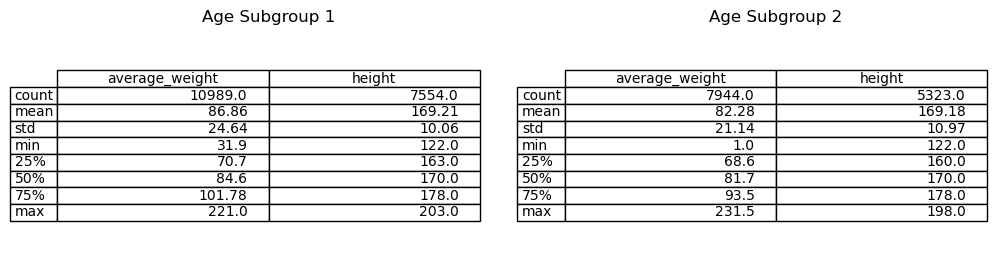

In [142]:
# Plotting for age subgroups
dfs_age = [df_age_leq65, df_age_g65]
cols_age = ['average_weight', 'height']

fig, axs = plt.subplots(1, 2, figsize=(12, 3))

for i, df in enumerate(dfs_age):
    axs[i].set_title(f'Age Subgroup {i+1}')
    axs[i].axis('off')
    axs[i].table(cellText=df[cols_age].describe().values.round(2),
                 colLabels=df[cols_age].describe().columns,
                 rowLabels=['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'],
                 loc='center')

plt.show()

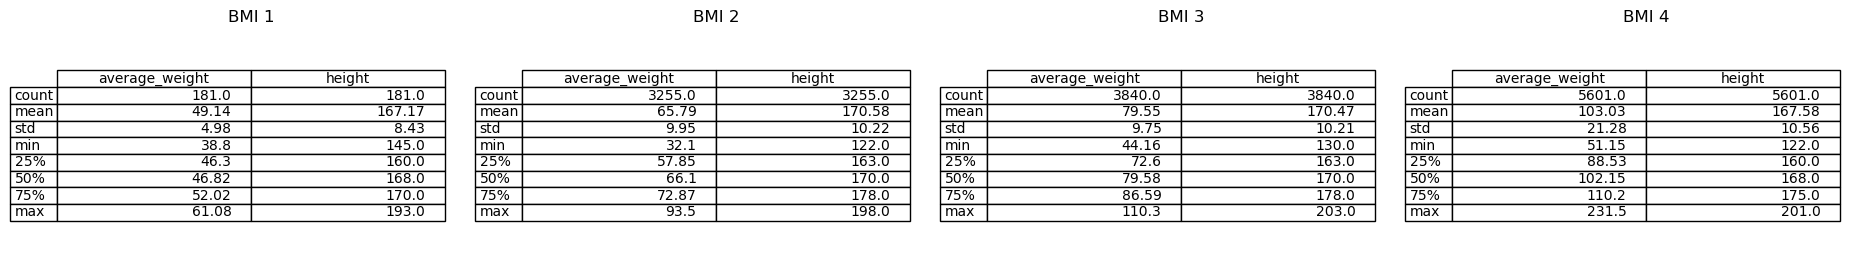

In [149]:
# Plotting for BMI subgroups
fig, axs = plt.subplots(1, 4, figsize=(23, 3))

dfs_bmi = [df_bmi1, df_bmi2, df_bmi3, df_bmi4]
cols_bmi = ['average_weight', 'height']

for i, df in enumerate(dfs_bmi):
    axs[i].set_title(f'BMI {i+1}')
    axs[i].axis('off')
    axs[i].table(cellText=df[cols_bmi].describe().values.round(2),
                 colLabels=df[cols_bmi].describe().columns,
                 rowLabels=['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'],
                 loc='center')

plt.show()

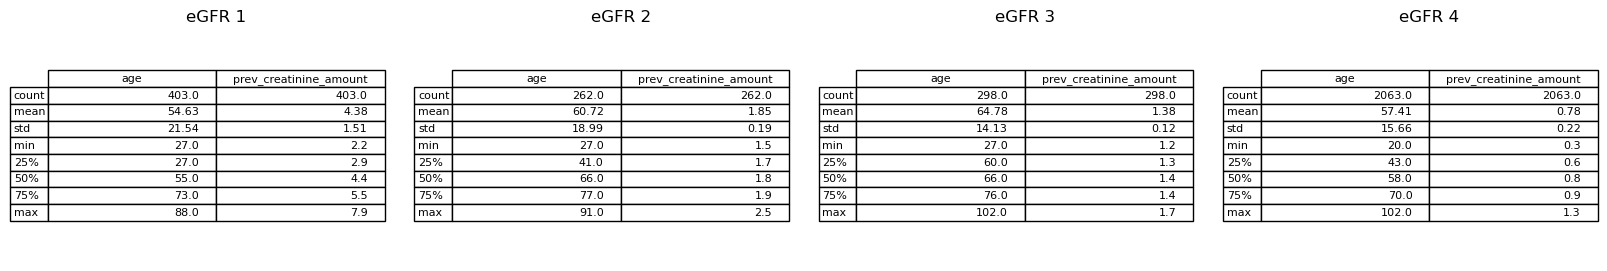

In [145]:
# Plotting for eGFR subgroups
dfs_eGFR = [df_eGFR1, df_eGFR2, df_eGFR3, df_eGFR4]
cols_eGFR = ['age', 'prev_creatinine_amount']

fig, axs = plt.subplots(1, 4, figsize=(20, 3))

for i, df in enumerate(dfs_eGFR):
    axs[i].set_title(f'eGFR {i+1}')
    axs[i].axis('off')
    axs[i].table(cellText=df[cols_eGFR].describe().values.round(2),
                 colLabels=df[cols_eGFR].describe().columns,
                 rowLabels=['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'],
                 loc='center')

plt.show()


/var/folders/_c/sdnjbh3j2k32jff8ry29g28w0000gn/T/ipykernel_2768/3819262083.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(age_labels, rotation=45, ha="right")
/var/folders/_c/sdnjbh3j2k32jff8ry29g28w0000gn/T/ipykernel_2768/3819262083.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(bmi_labels, rotation=45, ha="right")
/var/folders/_c/sdnjbh3j2k32jff8ry29g28w0000gn/T/ipykernel_2768/3819262083.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2].set_xticklabels(eGFR_labels, rotation=45, ha="right")


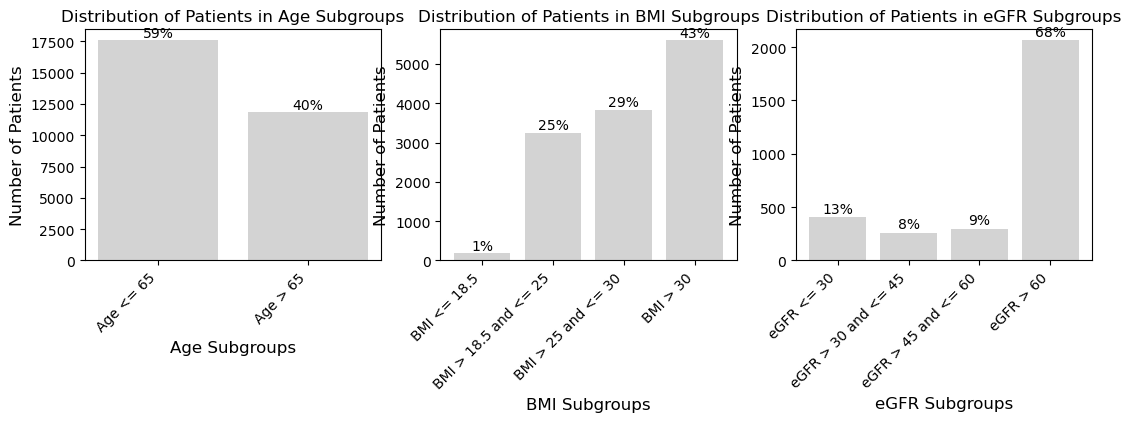

In [300]:
import matplotlib.pyplot as plt

# Distribution of patients in age subgroups
age_labels = ['Age <= 65', 'Age > 65']
age_counts = [len(df_age_leq65), len(df_age_g65)]
total_age = sum(age_counts)
age_percentages = [int((count / total_age) * 100) for count in age_counts]

# Distribution of patients in BMI subgroups
bmi_labels = ['BMI <= 18.5', 'BMI > 18.5 and <= 25', 'BMI > 25 and <= 30', 'BMI > 30']
bmi_counts = [len(df_bmi1), len(df_bmi2), len(df_bmi3), len(df_bmi4)]
total_bmi = sum(bmi_counts)
bmi_percentages = [int((count / total_bmi) * 100) for count in bmi_counts]

# Distribution of patients in eGFR subgroups
eGFR_labels = ['eGFR <= 30', 'eGFR > 30 and <= 45', 'eGFR > 45 and <= 60', 'eGFR > 60']
eGFR_counts = [len(df_eGFR1), len(df_eGFR2), len(df_eGFR3), len(df_eGFR4)]
total_eGFR = sum(eGFR_counts)
eGFR_percentages = [int((count / total_eGFR) * 100) for count in eGFR_counts]

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(13, 3))

# Age subplot
axs[0].bar(age_labels, age_counts, color='lightgrey')
axs[0].set_title('Distribution of Patients in Age Subgroups')
axs[0].set_xlabel('Age Subgroups', fontsize=12)
axs[0].set_ylabel('Number of Patients', fontsize=12)
axs[0].set_xticklabels(age_labels, rotation=45, ha="right")
for i, v in enumerate(age_percentages):
    axs[0].text(i, age_counts[i] + 10, str(v) + '%', ha='center', va='bottom', fontsize=10)

# BMI subplot
axs[1].bar(bmi_labels, bmi_counts, color='lightgrey')
axs[1].set_title('Distribution of Patients in BMI Subgroups')
axs[1].set_xlabel('BMI Subgroups', fontsize=12)
axs[1].set_ylabel('Number of Patients', fontsize=12)
axs[1].set_xticklabels(bmi_labels, rotation=45, ha="right")
for i, v in enumerate(bmi_percentages):
    axs[1].text(i, bmi_counts[i] + 10, str(v) + '%', ha='center', va='bottom', fontsize=10)

# eGFR subplot
axs[2].bar(eGFR_labels, eGFR_counts, color='lightgrey')
axs[2].set_title('Distribution of Patients in eGFR Subgroups')
axs[2].set_xlabel('eGFR Subgroups', fontsize=12)
axs[2].set_ylabel('Number of Patients', fontsize=12)
axs[2].set_xticklabels(eGFR_labels, rotation=45, ha="right")
for i, v in enumerate(eGFR_percentages):
    axs[2].text(i, eGFR_counts[i] + 10, str(v) + '%', ha='center', va='bottom', fontsize=10)

plt.show()
